In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample

# Read Data

In [2]:
path_combined_2021 = 'data/Combined_Flights_2021.csv'
path_airlines = 'data/Airlines.csv'
path_raw_2021_1 = 'data/raw/Flights_2021_1.csv'
path_airport_codes = 'data/airport-codes_csv.csv'

In [3]:
# Reading the CSV file and storing it as a DataFrame
df_combined_2021 = pd.read_csv(path_combined_2021)
df_combined_2021.head()

FlightDate                Airline Origin Dest  Cancelled  Diverted  \
0  2021-03-03  SkyWest Airlines Inc.    SGU  PHX      False     False   
1  2021-03-03  SkyWest Airlines Inc.    PHX  SGU      False     False   
2  2021-03-03  SkyWest Airlines Inc.    MHT  ORD      False     False   
3  2021-03-03  SkyWest Airlines Inc.    DFW  TRI      False     False   
4  2021-03-03  SkyWest Airlines Inc.    PHX  BFL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  \
0         724    714.0              0.0     -10.0  ...      724.0     813.0   
1         922    917.0              0.0      -5.0  ...      940.0    1028.0   
2        1330   1321.0              0.0      -9.0  ...     1336.0    1445.0   
3        1645   1636.0              0.0      -9.0  ...     1703.0    1955.0   
4        1844   1838.0              0.0      -6.0  ...     1851.0    1900.0   

   TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTimeBlk  \
0     5.0         843     -25.0       0.0                -2.0   0800-0859   
1     3.0        1040      -9.0       0.0                -1.0   1000-1059   
2    16.0        1530     -29.0       0.0                -2.0   1500-1559   
3     7.0        2010      -8.0       0.0                -1.0   2000-2059   
4     3.0        1925     -22.0       0.0                -2.0   1900-1959   

   DistanceGroup  DivAirportLandings  
0              2                 0.0  
1              2                 0.0  
2              4                 0.0  
3              4                 0.0  
4              2                 0.0  

[5 rows x 61 columns]

In [4]:
for column in df_combined_2021.columns:
    print(f"{column}: {df_combined_2021[column].dtype}")

FlightDate: object
Airline: object
Origin: object
Dest: object
Cancelled: bool
Diverted: bool
CRSDepTime: int64
DepTime: float64
DepDelayMinutes: float64
DepDelay: float64
ArrTime: float64
ArrDelayMinutes: float64
AirTime: float64
CRSElapsedTime: float64
ActualElapsedTime: float64
Distance: float64
Year: int64
Quarter: int64
Month: int64
DayofMonth: int64
DayOfWeek: int64
Marketing_Airline_Network: object
Operated_or_Branded_Code_Share_Partners: object
DOT_ID_Marketing_Airline: int64
IATA_Code_Marketing_Airline: object
Flight_Number_Marketing_Airline: int64
Operating_Airline: object
DOT_ID_Operating_Airline: int64
IATA_Code_Operating_Airline: object
Tail_Number: object
Flight_Number_Operating_Airline: int64
OriginAirportID: int64
OriginAirportSeqID: int64
OriginCityMarketID: int64
OriginCityName: object
OriginState: object
OriginStateFips: int64
OriginStateName: object
OriginWac: int64
DestAirportID: int64
DestAirportSeqID: int64
DestCityMarketID: int64
DestCityName: object
DestState: 

In [5]:
df_airlines = pd.read_csv(path_airlines)
df_airlines.head()

Code                    Description
0  02Q                  Titan Airways
1  04Q             Tradewind Aviation
2  05Q            Comlux Aviation, AG
3  06Q  Master Top Linhas Aereas Ltd.
4  07Q            Flair Airlines Ltd.

In [6]:
df_raw_2021_1 = pd.read_csv(path_raw_2021_1)
df_raw_2021_1.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_48284/2299105374.py:1: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_2021_1 = pd.read_csv(path_raw_2021_1)


Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0  2021        1      1           2          6  2021-01-02   
1  2021        1      1           3          7  2021-01-03   
2  2021        1      1           4          1  2021-01-04   
3  2021        1      1           7          4  2021-01-07   
4  2021        1      1           8          5  2021-01-08   

  Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  \
0                        DL                            DL_CODESHARE   
1                        DL                            DL_CODESHARE   
2                        DL                            DL_CODESHARE   
3                        DL                            DL_CODESHARE   
4                        DL                            DL_CODESHARE   

   DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  ...  Div5Airport  \
0                     19790                          DL  ...          NaN   
1                     19790                          DL  ...          NaN   
2                     19790                          DL  ...          NaN   
3                     19790                          DL  ...          NaN   
4                     19790                          DL  ...          NaN   

  Div5AirportID  Div5AirportSeqID Div5WheelsOn  Div5TotalGTime  \
0           NaN               NaN          NaN             NaN   
1           NaN               NaN          NaN             NaN   
2           NaN               NaN          NaN             NaN   
3           NaN               NaN          NaN             NaN   
4           NaN               NaN          NaN             NaN   

  Div5LongestGTime  Div5WheelsOff Div5TailNum Duplicate  Unnamed: 119  
0              NaN            NaN         NaN         N           NaN  
1              NaN            NaN         NaN         N           NaN  
2              NaN            NaN         NaN         N           NaN  
3              NaN            NaN         NaN         N           NaN  
4              NaN            NaN         NaN         N           NaN  

[5 rows x 120 columns]

# 1. EDA of Cancelled

## 1.1 Class Imbalance

Cancelled
False    6200853
True      111018
Name: count, dtype: int64


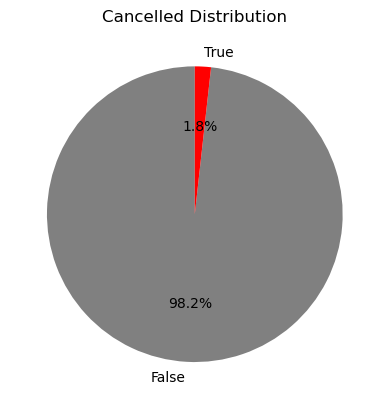

In [7]:
cancelled_counts = df_combined_2021['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 1.2 Histograms Cancelled/Not Cancelled

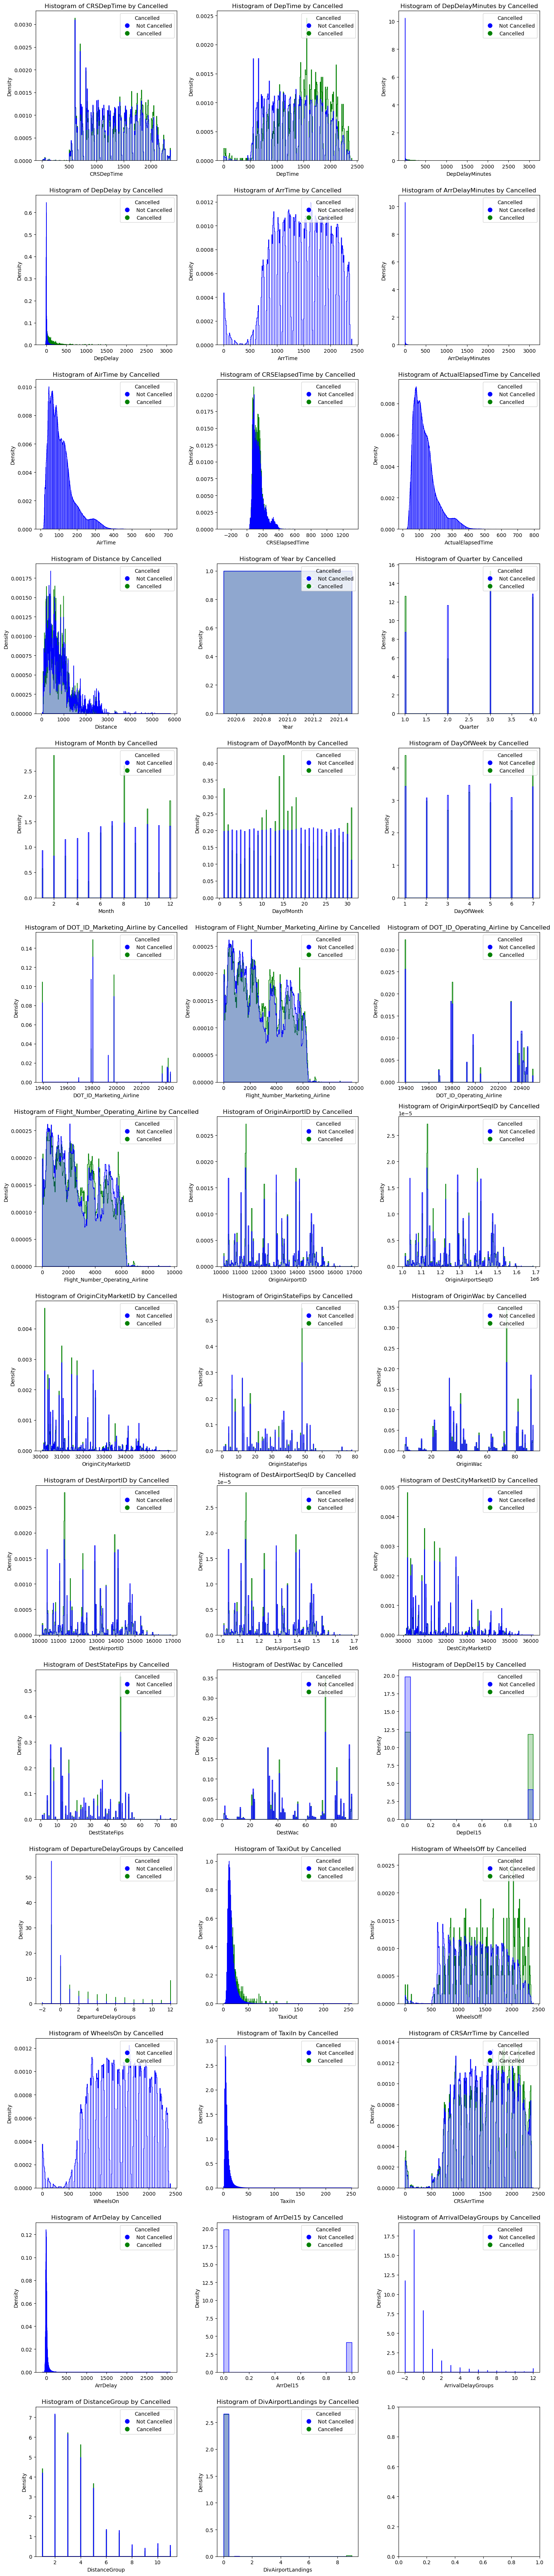

In [8]:

# Select only numerical columns
numeric_columns = df_combined_2021.select_dtypes(include='number').columns

# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create histograms for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip "Target" column
    if col == "Cancelled":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plot overlapping histograms for "M" and "B"
        sns.histplot(data=df_combined_2021, x=col, hue="Cancelled", element="step", stat="density",
                     common_norm=False, palette={False: "blue", True: "green"}, ax=ax)
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram of {col} by Cancelled")
    
    # Handle legend separately
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = {False: 'Not Cancelled', True: 'Cancelled'}
    custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Cancelled", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


## 1.3 Boxplots Cancelled/Not Cancelled

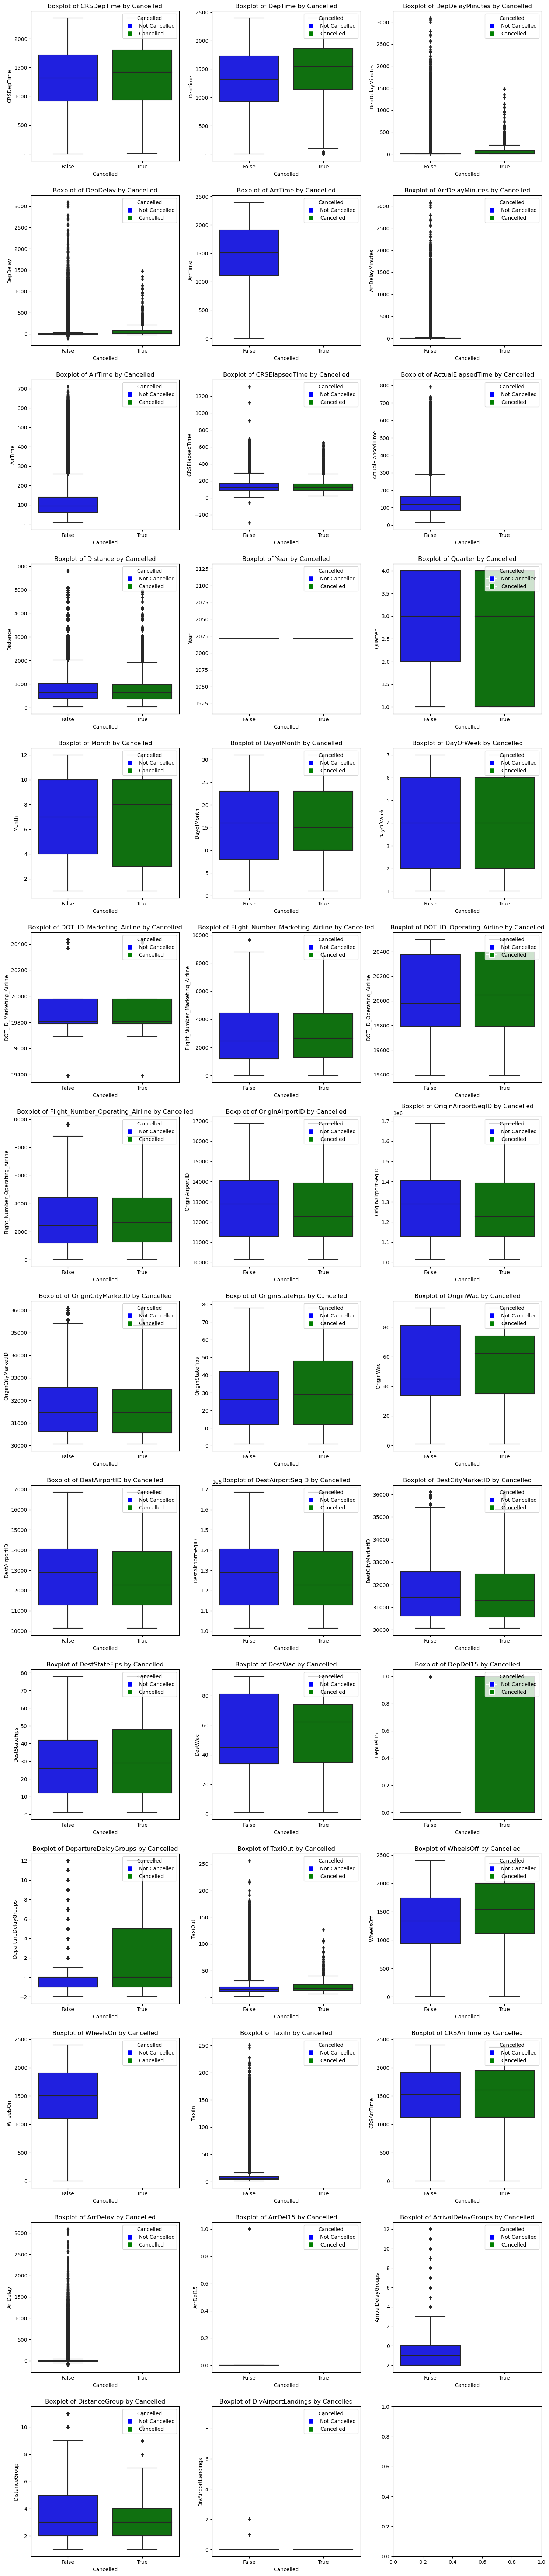

In [9]:
# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip Target column
    if col == "Cancelled":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Create side-by-side box plots
        sns.boxplot(data=df_combined_2021, x="Cancelled", y=col, palette={False: "blue", True: "green"}, ax=ax)
    
    # Add legend
    custom_labels = {False: 'Not Cancelled', True: 'Cancelled'}
    custom_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Cancelled", loc="upper right")
    
    # Set labels and title
    ax.set_xlabel("Cancelled")
    ax.set_ylabel(col)
    ax.set_title(f"Boxplot of {col} by Cancelled")

# Adjust layout
plt.tight_layout()
plt.show()

## 1.4 Analyze Cat Columns

In [10]:
# Select only columns with object and boolean data types
df_filtered = df_combined_2021.select_dtypes(include=['object', 'bool'])
df_filtered.head()

FlightDate                Airline Origin Dest  Cancelled  Diverted  \
0  2021-03-03  SkyWest Airlines Inc.    SGU  PHX      False     False   
1  2021-03-03  SkyWest Airlines Inc.    PHX  SGU      False     False   
2  2021-03-03  SkyWest Airlines Inc.    MHT  ORD      False     False   
3  2021-03-03  SkyWest Airlines Inc.    DFW  TRI      False     False   
4  2021-03-03  SkyWest Airlines Inc.    PHX  BFL      False     False   

  Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  \
0                        AA                            AA_CODESHARE   
1                        AA                            AA_CODESHARE   
2                        AA                            AA_CODESHARE   
3                        AA                            AA_CODESHARE   
4                        AA                            AA_CODESHARE   

  IATA_Code_Marketing_Airline Operating_Airline IATA_Code_Operating_Airline  \
0                          AA                OO                          OO   
1                          AA                OO                          OO   
2                          AA                OO                          OO   
3                          AA                OO                          OO   
4                          AA                OO                          OO   

  Tail_Number         OriginCityName OriginState OriginStateName  \
0      N728SK         St. George, UT          UT            Utah   
1      N752SK            Phoenix, AZ          AZ         Arizona   
2      N766SK         Manchester, NH          NH   New Hampshire   
3      N752EV  Dallas/Fort Worth, TX          TX           Texas   
4      N715SK            Phoenix, AZ          AZ         Arizona   

                         DestCityName DestState DestStateName DepTimeBlk  \
0                         Phoenix, AZ        AZ       Arizona  0700-0759   
1                      St. George, UT        UT          Utah  0900-0959   
2                         Chicago, IL        IL      Illinois  1300-1359   
3  Bristol/Johnson City/Kingsport, TN        TN     Tennessee  1600-1659   
4                     Bakersfield, CA        CA    California  1800-1859   

  ArrTimeBlk  
0  0800-0859  
1  1000-1059  
2  1500-1559  
3  2000-2059  
4  1900-1959

In [11]:
df_filtered.nunique()

FlightDate                                  365
Airline                                      22
Origin                                      380
Dest                                        380
Cancelled                                     2
Diverted                                      2
Marketing_Airline_Network                    10
Operated_or_Branded_Code_Share_Partners      15
IATA_Code_Marketing_Airline                  10
Operating_Airline                            22
IATA_Code_Operating_Airline                  22
Tail_Number                                5785
OriginCityName                              374
OriginState                                  53
OriginStateName                              53
DestCityName                                374
DestState                                    53
DestStateName                                53
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64

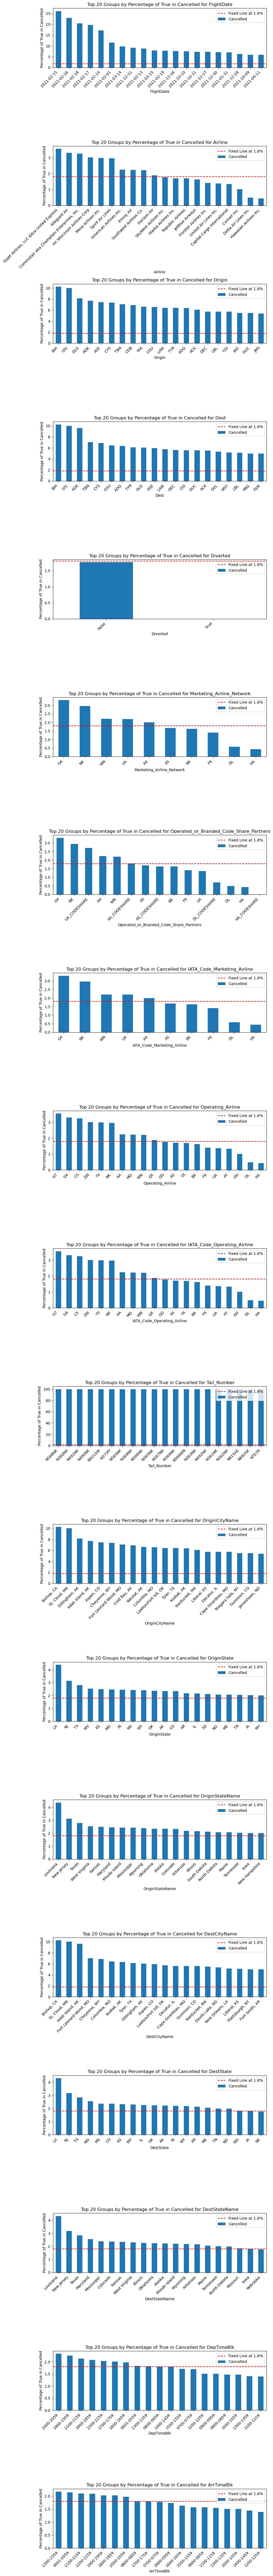

In [12]:

# Exclude the 'Cancelled' column
columns_to_groupby = [col for col in df_filtered.columns if col != 'Cancelled']

# Initialize plot
fig, axes = plt.subplots(len(columns_to_groupby), 1, figsize=(10, len(columns_to_groupby)*5))

# Calculate percentage of True counts for each group
for i, col in enumerate(columns_to_groupby):
    percentage_true = (df_filtered.groupby(col)['Cancelled']
                       .mean()
                       .mul(100)
                       .sort_values(ascending=False)
                       .head(20))

    # Plot top 20 values in a bar chart
    ax = axes[i]
    percentage_true.plot(kind='bar', ax=ax)
    ax.axhline(y=1.8, color='r', linestyle='--', label='Fixed Line at 1.8%')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage of True in Cancelled')
    ax.set_title(f'Top 20 Groups by Percentage of True in Cancelled for {col}')
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# EDA of Delayed

In [13]:
df_combined_2021['Delayed'] = df_combined_2021['DepDel15'].apply(lambda x: True if x == 1 else False)

Delayed
False    5237604
True     1074267
Name: count, dtype: int64


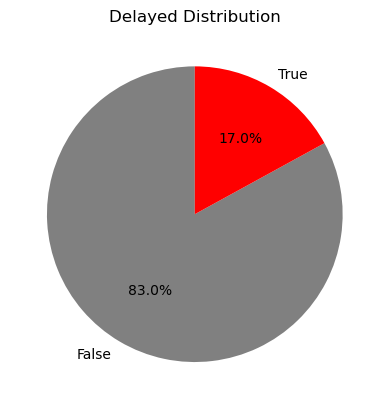

In [14]:
delayed_counts = df_combined_2021['Delayed'].value_counts()
print(delayed_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(delayed_counts, labels=delayed_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in delayed_counts.index])
plt.title('Delayed Distribution')
plt.show()

## 2.2 Histograms

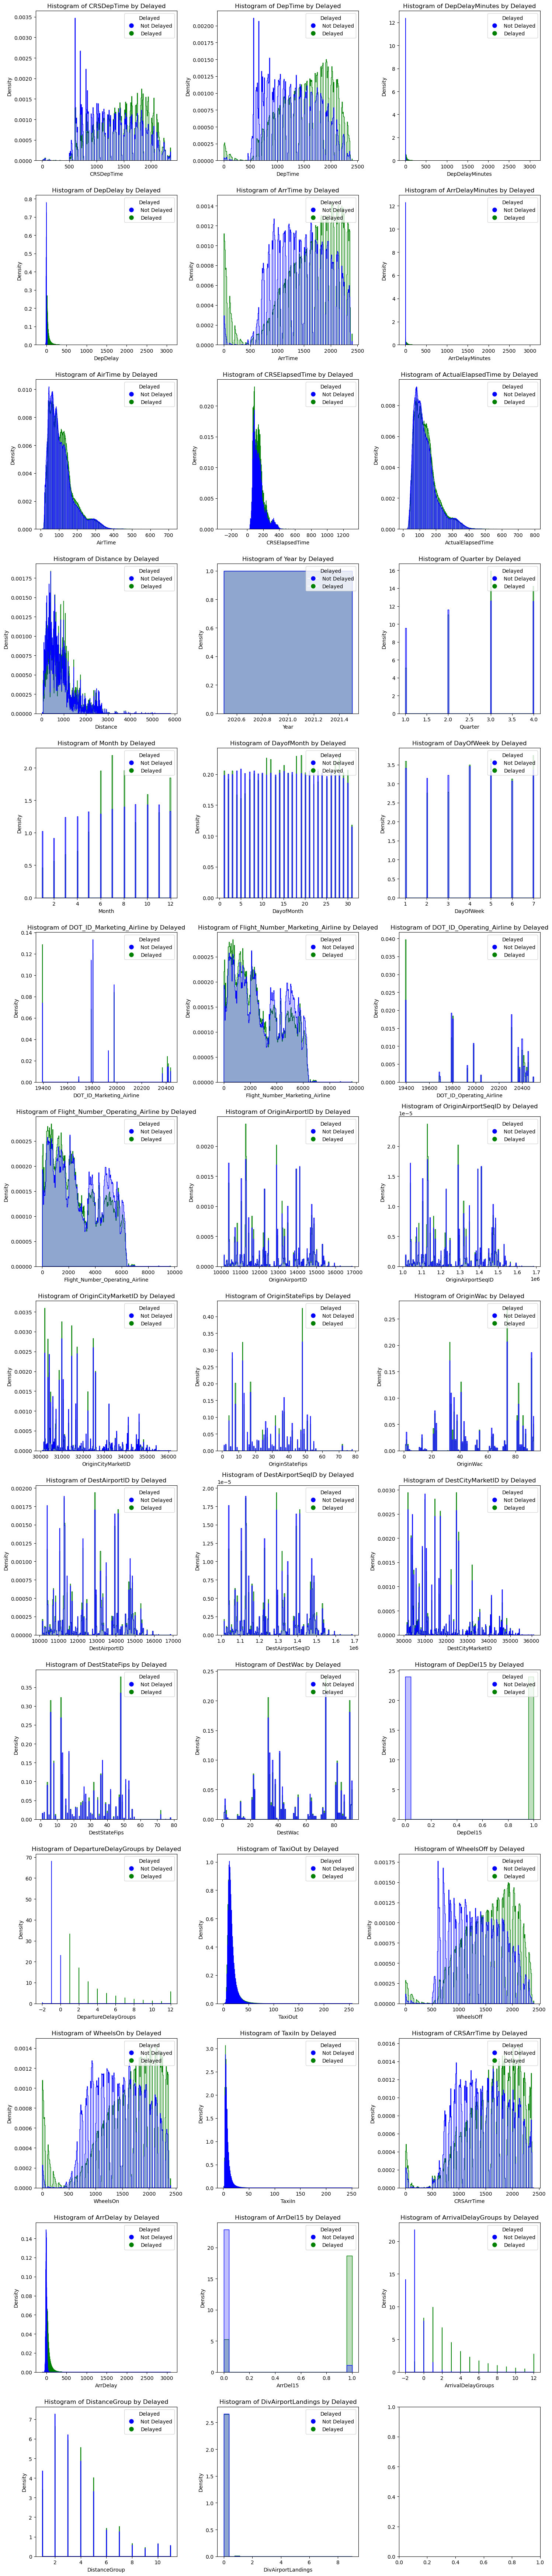

In [15]:

# Select only numerical columns
numeric_columns = df_combined_2021.select_dtypes(include='number').columns

# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create histograms for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip "Target" column
    if col == "Delayed":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plot overlapping histograms for "M" and "B"
        sns.histplot(data=df_combined_2021, x=col, hue="Delayed", element="step", stat="density",
                     common_norm=False, palette={False: "blue", True: "green"}, ax=ax)
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram of {col} by Delayed")
    
    # Handle legend separately
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = {False: 'Not Delayed', True: 'Delayed'}
    custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Delayed", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


## 2.3 Boxplots

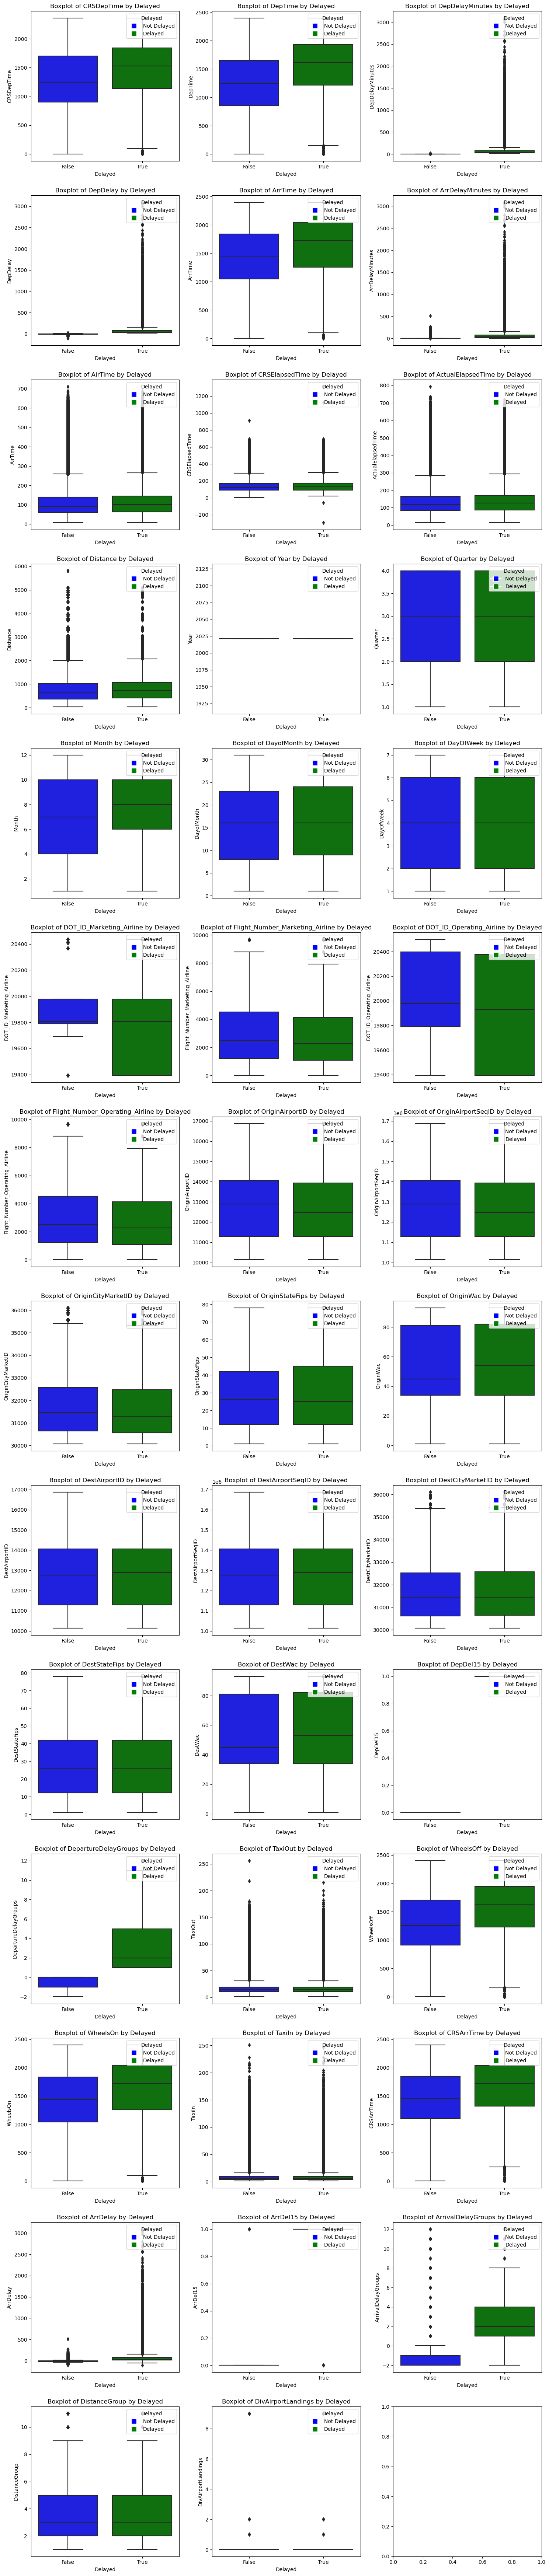

In [16]:
# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip Target column
    if col == "Delayed":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Create side-by-side box plots
        sns.boxplot(data=df_combined_2021, x="Delayed", y=col, palette={False: "blue", True: "green"}, ax=ax)
    
    # Add legend
    custom_labels = {False: 'Not Delayed', True: 'Delayed'}
    custom_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Delayed", loc="upper right")
    
    # Set labels and title
    ax.set_xlabel("Delayed")
    ax.set_ylabel(col)
    ax.set_title(f"Boxplot of {col} by Delayed")

# Adjust layout
plt.tight_layout()
plt.show()

## 2.4 Analysis of Cat Predictors

In [17]:
# Select only columns with object and boolean data types
df_filtered = df_combined_2021.select_dtypes(include=['object', 'bool'])
df_filtered.head()

FlightDate                Airline Origin Dest  Cancelled  Diverted  \
0  2021-03-03  SkyWest Airlines Inc.    SGU  PHX      False     False   
1  2021-03-03  SkyWest Airlines Inc.    PHX  SGU      False     False   
2  2021-03-03  SkyWest Airlines Inc.    MHT  ORD      False     False   
3  2021-03-03  SkyWest Airlines Inc.    DFW  TRI      False     False   
4  2021-03-03  SkyWest Airlines Inc.    PHX  BFL      False     False   

  Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  \
0                        AA                            AA_CODESHARE   
1                        AA                            AA_CODESHARE   
2                        AA                            AA_CODESHARE   
3                        AA                            AA_CODESHARE   
4                        AA                            AA_CODESHARE   

  IATA_Code_Marketing_Airline Operating_Airline  ... Tail_Number  \
0                          AA                OO  ...      N728SK   
1                          AA                OO  ...      N752SK   
2                          AA                OO  ...      N766SK   
3                          AA                OO  ...      N752EV   
4                          AA                OO  ...      N715SK   

          OriginCityName OriginState OriginStateName  \
0         St. George, UT          UT            Utah   
1            Phoenix, AZ          AZ         Arizona   
2         Manchester, NH          NH   New Hampshire   
3  Dallas/Fort Worth, TX          TX           Texas   
4            Phoenix, AZ          AZ         Arizona   

                         DestCityName DestState DestStateName DepTimeBlk  \
0                         Phoenix, AZ        AZ       Arizona  0700-0759   
1                      St. George, UT        UT          Utah  0900-0959   
2                         Chicago, IL        IL      Illinois  1300-1359   
3  Bristol/Johnson City/Kingsport, TN        TN     Tennessee  1600-1659   
4                     Bakersfield, CA        CA    California  1800-1859   

  ArrTimeBlk Delayed  
0  0800-0859   False  
1  1000-1059   False  
2  1500-1559   False  
3  2000-2059   False  
4  1900-1959   False  

[5 rows x 21 columns]

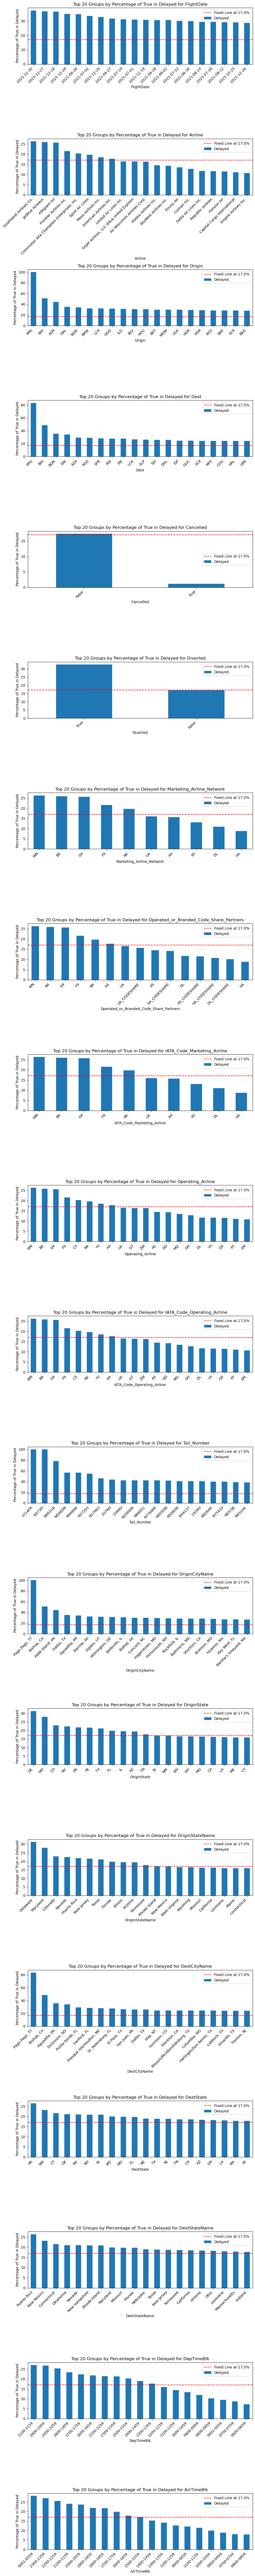

In [18]:

# Exclude the 'Cancelled' column
columns_to_groupby = [col for col in df_filtered.columns if col != 'Delayed']

# Initialize plot
fig, axes = plt.subplots(len(columns_to_groupby), 1, figsize=(10, len(columns_to_groupby)*5))

# Calculate percentage of True counts for each group
for i, col in enumerate(columns_to_groupby):
    percentage_true = (df_filtered.groupby(col)['Delayed']
                       .mean()
                       .mul(100)
                       .sort_values(ascending=False)
                       .head(20))

    # Plot top 20 values in a bar chart
    ax = axes[i]
    percentage_true.plot(kind='bar', ax=ax)
    ax.axhline(y=17.0, color='r', linestyle='--', label='Fixed Line at 17.0%')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage of True in Delayed')
    ax.set_title(f'Top 20 Groups by Percentage of True in Delayed for {col}')
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
